<a href="https://www.kaggle.com/code/sitbayevalibek/text-classification-nlp?scriptVersionId=134984895" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pickle
import string
import nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report , confusion_matrix

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sitbayevalibek/aralash-datasetlar/main/tourism%20and%20other%20topics%20CSV.csv')
df

,text,label
0,What are the popular tourist destinations in ...,1
1,What are the benefits of tourism for local ec...,1
2,How does sustainable tourism contribute to en...,1
3,What are the key factors that influence a tra...,1
4,What are the impacts of mass tourism on cultu...,1
...,...,...
989,How does social media affect the perception a...,0
990,What are the effects of water scarcity on agr...,0
991,How does technology impact the field of renew...,0
992,What are the benefits of promoting gender equ...,0


1    497
0    497
Name: label, dtype: int64


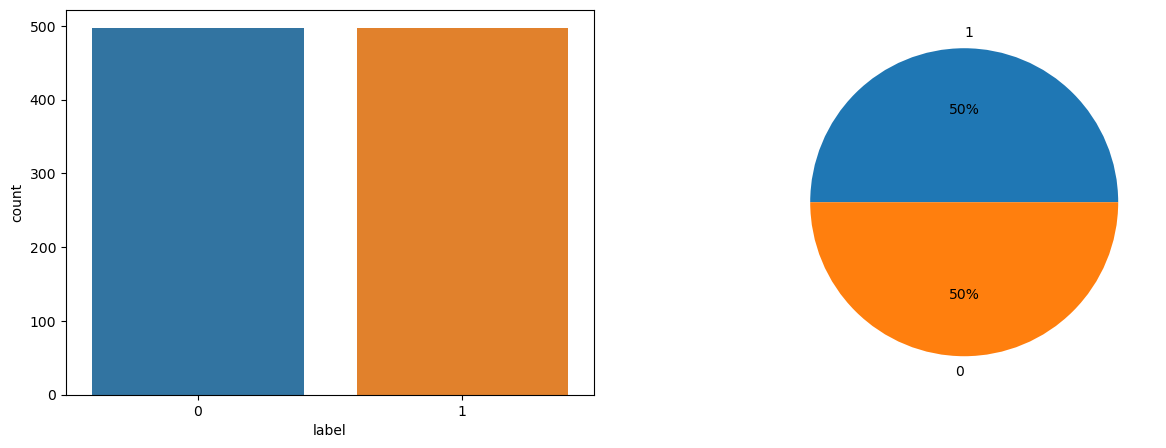

In [3]:
classCnt = df['label'].value_counts()
print(classCnt)

plt.figure(figsize=((15,5)))

plt.subplot(1,2,1)
sns.countplot(df,x='label')

plt.subplot(1,2,2)
plt.pie(classCnt,labels = classCnt.index,autopct='%.0f%%')

plt.show()

In [4]:
df['text']= df['text'].str.lower()

In [5]:
df['text'] = df['text'].str.replace(r'[^\w\s]+', '',regex = True)

In [6]:
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:

nltk.download('punkt')

df['text'] = df['text'].apply(lambda x:nltk.word_tokenize(x))

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
ps = PorterStemmer()
df['text'] = df['text'].apply(lambda x : [ps.stem(i) for i in x])

In [9]:
df['text']=df['text'].apply(lambda x : ' '.join(x))

In [10]:
df

,text,label
0,popular tourist destin countri,1
1,benefit tourism local economi,1
2,sustain tourism contribut environment conserv,1
3,key factor influenc travel choic destin,1
4,impact mass tourism cultur heritag site,1
...,...,...
989,social media affect percept spread conspiraci ...,0
990,effect water scarciti agricultur product food ...,0
991,technolog impact field renew energi polici regul,0
992,benefit promot gender equal,0


In [11]:
df.to_csv('turizm_toza.csv')

In [12]:
df1 = pd.read_csv('turizm_toza.csv')
df1.head()

,Unnamed: 0,text,label
0,0,popular tourist destin countri,1
1,1,benefit tourism local economi,1
2,2,sustain tourism contribut environment conserv,1
3,3,key factor influenc travel choic destin,1
4,4,impact mass tourism cultur heritag site,1


In [13]:
x,y = df1['text'],df1['label']

In [14]:
vectorizer = TfidfVectorizer(min_df=50,max_features=5000)
x =  vectorizer.fit_transform(x).toarray()

In [15]:
with open('df1.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=5)

In [17]:
X_train.shape,X_test.shape

((695, 30), (299, 30))

## XG Boost yordamida o'qitish

In [18]:
model = XGBClassifier( eval_metric='map',max_depth=200,n_estimators=70,learning_rate=1.99)
model.fit(X_train,y_train.replace({"non-suicide":0,'suicide':1}))
print('Training score:',model.score(X_train,y_train.replace({"non-suicide":0,'suicide':1})))
print('Testing score:',model.score(X_test,y_test.replace({"non-suicide":0,'suicide':1})))

Training score: 0.9856115107913669
Testing score: 0.9899665551839465


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       159
           1       0.99      0.99      0.99       140

    accuracy                           0.99       299
   macro avg       0.99      0.99      0.99       299
weighted avg       0.99      0.99      0.99       299



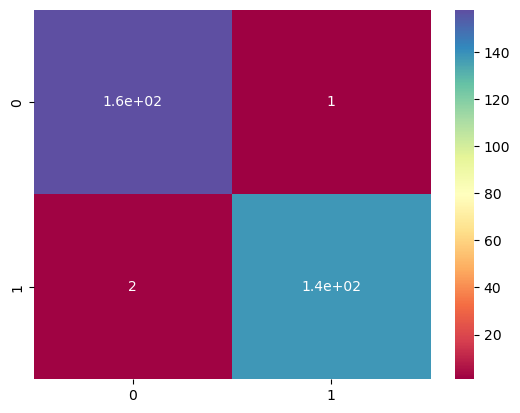

In [19]:
y_act = y_test.replace({"non-suicide":0,'suicide':1})
y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='Spectral')
print(classification_report(y_act,y_pred))

Modelni saqlash

In [20]:
with open('XGmodel.pkl', 'wb') as f:
    pickle.dump(model, f)

In [21]:
def preprocess(inp):
    inp = inp.lower()
    inp = inp.replace(r'[^\w\s]+', '')
    inp = [word for word in inp.split() if word not in (stop_words)]
    inp = ' '.join([ps.stem(i) for i in inp])
    inputToModel = vectorizer.transform([inp]).toarray()
    return inputToModel

In [22]:
def app(input_text):
    print('Text:', input_text)
    processed_array = preprocess(input_text)
    predict = model.predict(processed_array)

    if predict[0] == 0:
        print('Result: Non-tourism')
    elif predict[0] == 1:
        print('Result: Tourism')
    else:
        print('Result: Unknow')
#==========================================================================================================
# Sinab ko'rish
input_text = "What are the impacts of tourism on local communities and livelihoods?"               #<<<<<<<<<<<<<<<<<<<
app(input_text)
#==========================================================================================================

Text: What are the impacts of tourism on local communities and livelihoods?
Result: Tourism
